# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [17]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:

filtered_df = df [(df['bpm'] >= 120) & (df['bpm'] <= 140) & (df['mode'] == 'Minor') & (df['key'] == 'A') ]

filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
93,Donï¿½ï¿½ï¿½t Bl,Taylor Swift,1,2017,11,8,4875,23,685032533,19,...,136,A,Minor,62,19,53,11,0,6,4
120,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,128,A,Minor,75,79,63,33,0,15,4
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4
150,Mi Bello Angel,Natanael Cano,1,2023,6,30,86,8,31873544,7,...,128,A,Minor,81,90,77,1,0,9,5
194,Shut up My Moms Calling,Hotel Ugly,1,2020,2,10,1788,14,405136812,1,...,139,A,Minor,48,37,41,32,0,10,10


<Axes: ylabel='Frequency'>

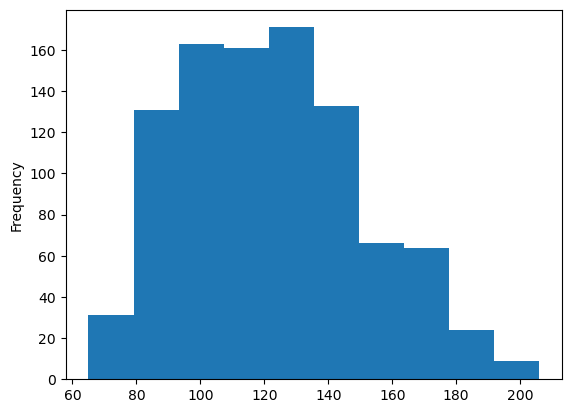

In [9]:
df['bpm'].plot(kind='hist')

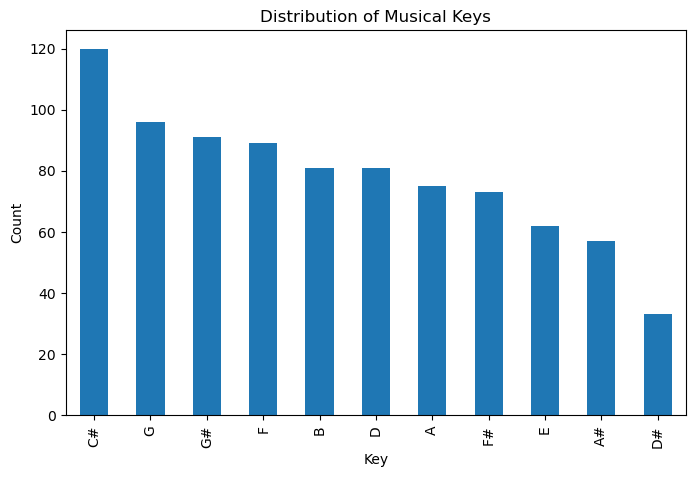

In [16]:
df["key"].value_counts().plot(kind="bar", figsize=(8,5))
plt.title("Distribution of Musical Keys")
plt.xlabel("Key")
plt.ylabel("Count")
plt.show()

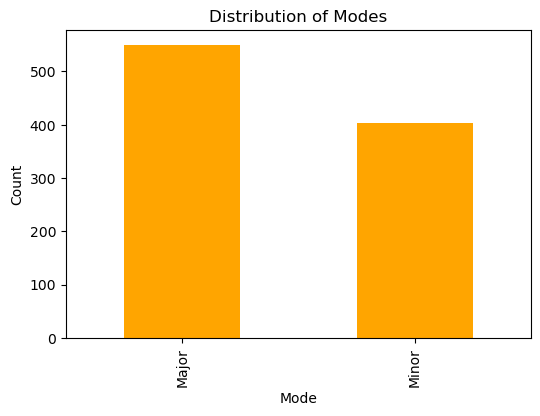

In [14]:
df["mode"].value_counts().plot(kind="bar", color="orange", figsize=(6,4))
plt.title("Distribution of Modes")
plt.xlabel("Mode")
plt.ylabel("Count")
plt.show()

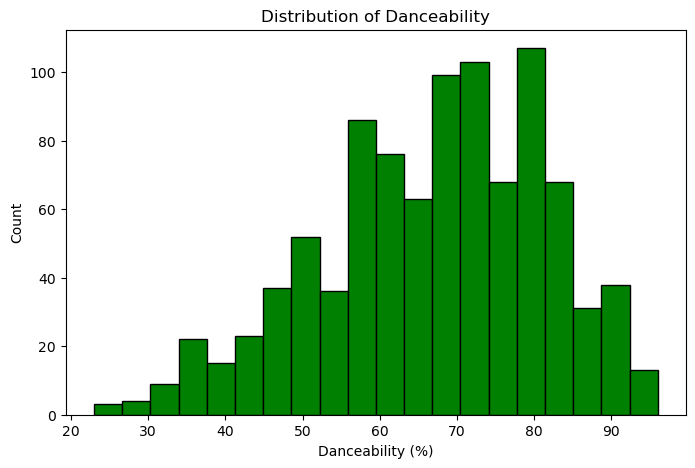

In [11]:
plt.figure(figsize=(8,5))
plt.hist(df["danceability_%"], bins=20, color="green", edgecolor="black")
plt.title("Distribution of Danceability")
plt.xlabel("Danceability (%)")
plt.ylabel("Count")
plt.show()

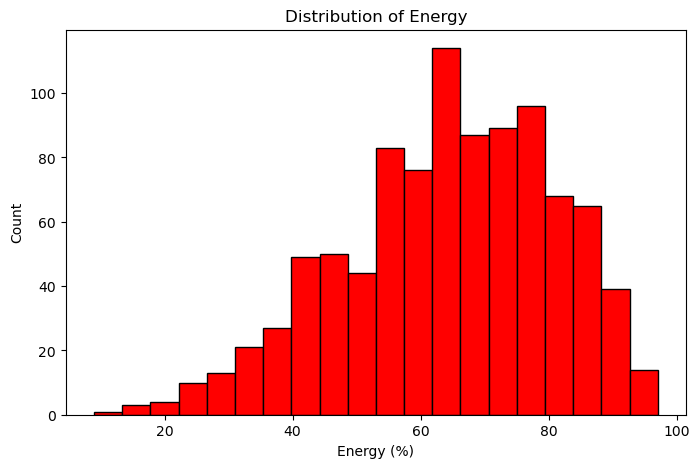

In [10]:
plt.figure(figsize=(8,5))
plt.hist(df["energy_%"], bins=20, color="red", edgecolor="black")
plt.title("Distribution of Energy")
plt.xlabel("Energy (%)")
plt.ylabel("Count")
plt.show()

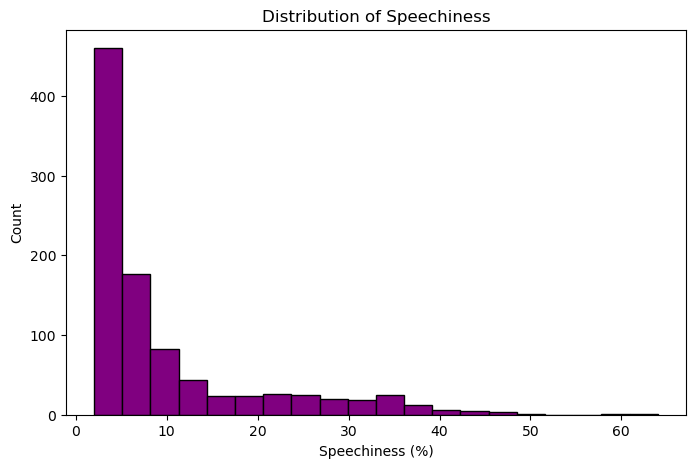

In [12]:
plt.figure(figsize=(8,5))
plt.hist(df["speechiness_%"], bins=20, color="purple", edgecolor="black")
plt.title("Distribution of Speechiness")
plt.xlabel("Speechiness (%)")
plt.ylabel("Count")
plt.show()

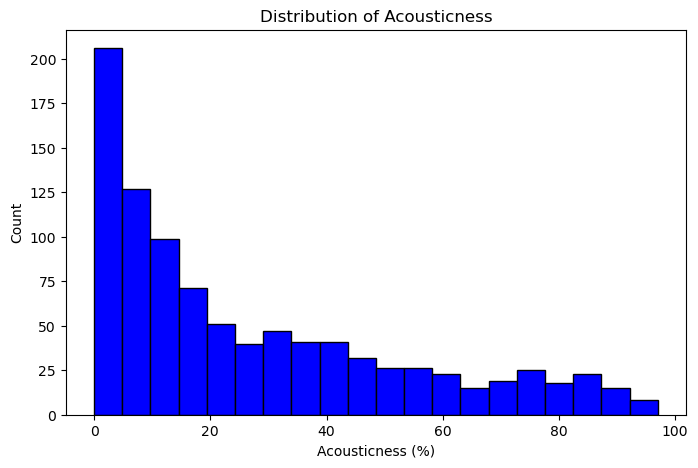

In [13]:
plt.figure(figsize=(8,5))
plt.hist(df["acousticness_%"], bins=20, color="blue", edgecolor="black")
plt.title("Distribution of Acousticness")
plt.xlabel("Acousticness (%)")
plt.ylabel("Count")
plt.show()

## The Perfect Song
A "perfect" song in this dataset would likely have a tempo between 100 and 140 BPM, written in the C# key, and in major mode. It should fall somewhere between 65% and 80% in danceability and should be quite energetic at around 55-75%. Finally, it should not only be low in speechiness (0-10%) but also in acousticness (0-20%).

In [22]:
import pandas as pd

# Load dataset
spotify_df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Apply filters for "perfect" song criteria
perfect_songs = spotify_df[
    (spotify_df["bpm"].between(100, 140)) &
    (spotify_df["key"] == "C#") &
    (spotify_df["mode"] == "Major") &
    (spotify_df["danceability_%"].between(65, 80)) &
    (spotify_df["energy_%"].between(55, 75)) &
    (spotify_df["speechiness_%"].between(0, 10)) &
    (spotify_df["acousticness_%"].between(0, 20))
]

# Show relevant columns
result = perfect_songs[[
    "track_name", "artist(s)_name", "bpm", "key", "mode", 
    "danceability_%", "energy_%", "speechiness_%", "acousticness_%", 
    "in_spotify_charts"
]]

print(result if not result.empty else "No songs meet all criteria.")


                                       track_name            artist(s)_name  \
162                                     One Dance       Drake, WizKid, Kyla   
236  AMERICA HAS A PROBLEM (feat. Kendrick Lamar)  Kendrick Lamar, Beyoncï¿   
600                         I WANNA BE YOUR SLAVE                 Mï¿½ï¿½ne   
866                             Betty (Get Money)                Yung Gravy   
937                                    Circo Loco          Drake, 21 Savage   

     bpm key   mode  danceability_%  energy_%  speechiness_%  acousticness_%  \
162  104  C#  Major              77        63              5               1   
236  126  C#  Major              78        70              4               1   
600  133  C#  Major              75        61              4               0   
866  102  C#  Major              73        75              8               0   
937  104  C#  Major              73        61              7               1   

     in_spotify_charts  
162                

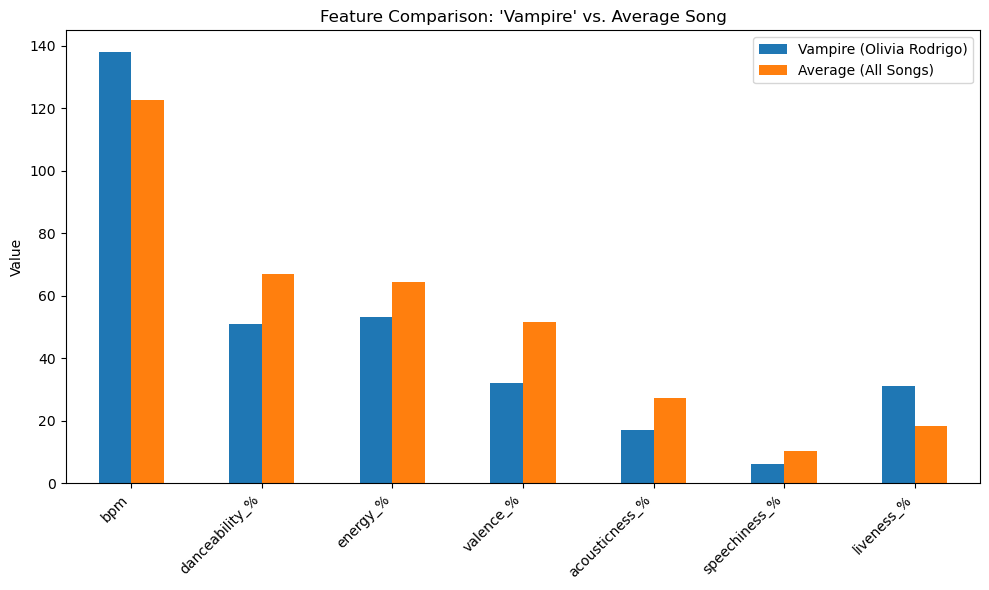

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

spotify_df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

song = spotify_df[spotify_df["track_name"].str.contains("vampire", case=False, na=False)]

features = ["bpm", "danceability_%", "energy_%", "valence_%", 
            "acousticness_%", "speechiness_%", "liveness_%"]

others_mean = spotify_df[features].mean()
vampire_values = song[features].iloc[0]

comparison_df = pd.DataFrame({
    "Vampire (Olivia Rodrigo)": vampire_values,
    "Average (All Songs)": others_mean
})

# Plot
comparison_df.plot(kind="bar", figsize=(10,6))
plt.title("Feature Comparison: 'Vampire' vs. Average Song")
plt.ylabel("Value")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()